Форма облака точек: (1000, 3)
Первые 5 цветов (RGB):
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]]


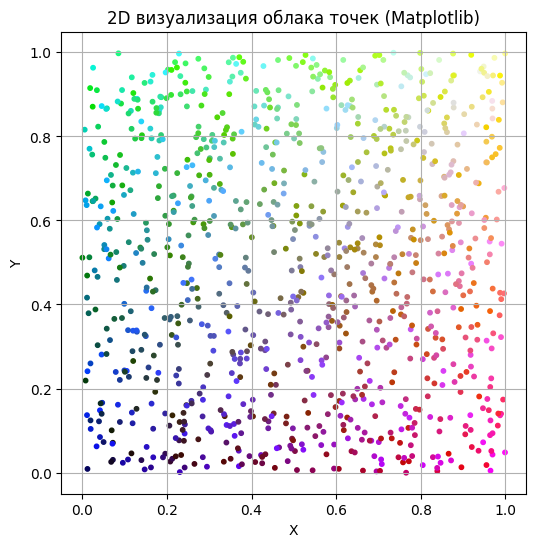

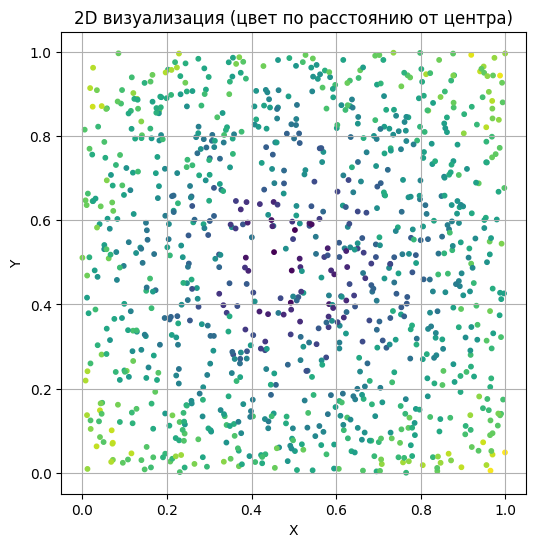

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


np.random.seed(42)
N = 1000
points = np.random.rand(N, 3)  # X, Y, Z в [0,1]
print("Форма облака точек:", points.shape)


colors = points.copy()  # R = X, G = Y, B = Z (уже в [0,1])
print("Первые 5 цветов (RGB):")
print(colors[:5])

plt.figure(figsize=(6,6))
plt.scatter(points[:,0], points[:,1], c=colors, s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D визуализация облака точек (Matplotlib)")
plt.grid(True)
plt.show()


# Формат цветов для Plotly: 'rgb(R,G,B)', где R,G,B ∈ [0,255]
colors_rgb = ['rgb({},{},{})'.format(int(r*255), int(g*255), int(b*255))
              for r,g,b in colors]

fig = go.Figure(data=[go.Scatter3d(
    x=points[:,0],
    y=points[:,1],
    z=points[:,2],
    mode='markers',
    marker=dict(
        size=3,
        color=colors_rgb
    )
)])
fig.update_layout(
    title='3D визуализация облака точек (Plotly)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)
fig.show()


center = np.array([0.5,0.5,0.5])
dist = np.linalg.norm(points - center, axis=1)
norm_dist = (dist - dist.min()) / (dist.max() - dist.min())  # нормализация
colors_alt = plt.cm.viridis(norm_dist)[:, :3]  # RGB из colormap

# 2D визуализация альтернативного цвета
plt.figure(figsize=(6,6))
plt.scatter(points[:,0], points[:,1], c=colors_alt, s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D визуализация (цвет по расстоянию от центра)")
plt.grid(True)
plt.show()

# 3D Plotly с альтернативным цветом
colors_alt_rgb = ['rgb({},{},{})'.format(int(r*255), int(g*255), int(b*255))
                  for r,g,b in colors_alt]

fig_alt = go.Figure(data=[go.Scatter3d(
    x=points[:,0],
    y=points[:,1],
    z=points[:,2],
    mode='markers',
    marker=dict(
        size=3,
        color=colors_alt_rgb
    )
)])
fig_alt.update_layout(
    title='3D визуализация облака точек (цвет по расстоянию)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)
fig_alt.show()


In [ ]:
а